In [2]:
%matplotlib inline

import os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse

from skimage.filters import threshold_otsu
from skimage.filters import sobel

import lmfit
from lmfit import Model

from tifffile import TiffFile

In [3]:
def plot(image, params=None):
            
    fig, ax = plt.subplots()
    im_ax = ax.imshow(image, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower')

    if params:
        ax.scatter(params['x0'], params['y0'], s=100, c="red", marker="x")

        circle = Circle((params['x0'], params['y0']), params['sigma'], facecolor='none',
                edgecolor="red", linewidth=1, alpha=0.8)
        ax.add_patch(circle)
        
    plt.colorbar(im_ax)

# 2D Gaussian model
def func(xy, x0, y0, sigma, H):

    x, y = xy
    
    A = 1 / (2 * sigma**2)
    I = H * np.exp(-A * ( (x - x0)**2 + (y - y0)**2))
    
    return I

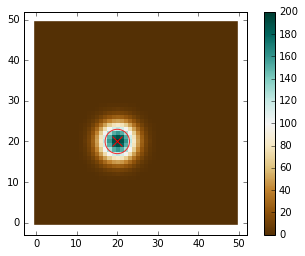

In [19]:
# Generate model

true_params = {'x0': 20, 'y0': 20, 'sigma': 3, 'H': 200}

x = np.arange(0, 50, 1)
y = np.arange(0, 50, 1)
xy = np.meshgrid(x, y)

model = Model(func)
image = model.eval(xy=xy, **true_params)
#image += np.random.poisson(600, image.shape)
plot(image, true_params)

[[Model]]
    Model(func)
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 2500
    # variables        = 4
    chi-square         = 107.188
    reduced chi-square = 0.043
    Akaike info crit   = -7861.644
    Bayesian info crit = -7838.348
[[Variables]]
    x0:      19.9980950 +/- 0.000946 (0.00%) (init= 21)
    y0:      19.9980950 +/- 0.000946 (0.00%) (init= 21)
    sigma:   2.97117336 +/- 0.000739 (0.02%) (init= 10)
    H:       201.714561 +/- 0.061114 (0.03%) (init= 400)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, H)                  = -0.762 



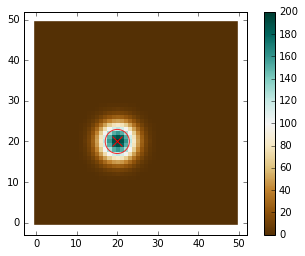

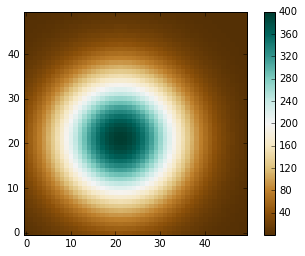

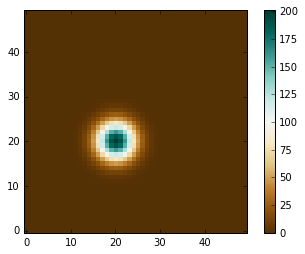

In [20]:
# Fit generated model

# Guess initials parameters
model.set_param_hint('x0', value=21, min=0, max=300)
model.set_param_hint('y0', value=21, min=0, max=300)
model.set_param_hint('sigma', value=10, min=0, max=10)
model.set_param_hint('H', value=400, min=0, max=1000)

# Prepare fit
x = np.arange(0, image.shape[1], 1)
y = np.arange(0, image.shape[0], 1)
xy = np.meshgrid(x, y)

# Fit
result = model.fit(image, xy=xy)

# Plot result
predicted_params = result.params
plot(image, predicted_params)

plot(result.init_fit)
plot(result.best_fit)

print(result.fit_report())
#lmfit.printfuncs.report_ci(result.conf_interval())

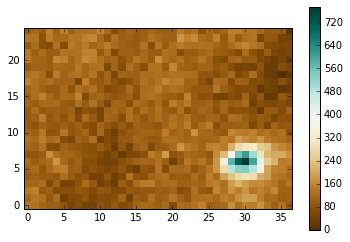

In [13]:
image = TiffFile("spot.tif").asarray()

# Rescaling image to get 0 for the lowest value
image -= image.min()

plot(image)

[[Model]]
    Model(func)
[[Fit Statistics]]
    # function evals   = 449
    # data points      = 925
    # variables        = 4
    chi-square         = 6798072.034
    reduced chi-square = 7381.186
    Akaike info crit   = 8246.688
    Bayesian info crit = 8266.007
[[Variables]]
    x0:      18.1726134 +/- 0.420684 (2.31%) (init= 5)
    y0:      10.9250430 +/- 0.494766 (4.53%) (init= 5)
    sigma:   9.98077464 +/- 0.454063 (4.55%) (init= 10)
    H:       177.441006 +/- 7.657873 (4.32%) (init= 200)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, H)                  =  0.747 
    C(y0, sigma)                 =  0.100 



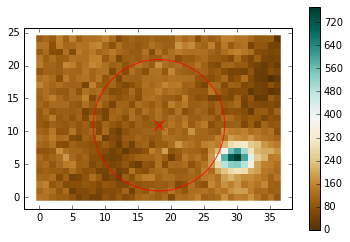

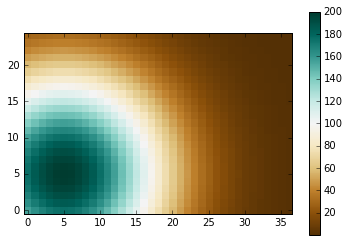

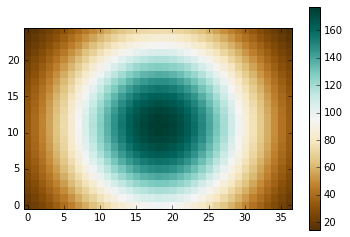

In [17]:
# Fit generated model

model = Model(func)

# Guess initials parameters
model.set_param_hint('x0', value=5, min=0, max=300)
model.set_param_hint('y0', value=5, min=0, max=300)
model.set_param_hint('sigma', value=10, min=0.1, max=10)
model.set_param_hint('H', value=200, min=0, max=1000)

# Prepare fit
x = np.arange(0, image.shape[1], 1)
y = np.arange(0, image.shape[0], 1)
xy = np.meshgrid(x, y)

# Fit
result = model.fit(image, xy=xy, verbose=False)

# Plot result
predicted_params = result.params
plot(image, predicted_params)

plot(result.init_fit)
plot(result.best_fit)

print(result.fit_report())